In [1]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from sklearn.model_selection import StratifiedKFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [2]:
dataset = "Comment Spam.xls"

In [3]:
df = pd.read_excel(dataset)

In [4]:
df.head()

,No,Comment,Class
0,1,this song is racist,0
1,2,and how many subscribers compared to her over ...,1
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,4,well done shakira,0
4,5,:D subscribe to me for daily vines,1


In [5]:
df.isna().sum()

No         0
Comment    0
Class      0
dtype: int64

In [6]:
duplicate = df[df.duplicated()]
duplicate.head()

,No,Comment,Class


In [7]:
df.groupby('Class').count().T

Class,0,1
No,631,669
Comment,631,669


In [8]:
# Get all the Not Spam and Spam Comment
not_spam = df[df.Class == 0]
spam = df[df.Class== 1]

# Create numpy list to visualize using wordcloud
not_spam_text = " ".join(not_spam.Comment.to_numpy().tolist())
spam_text = " ".join(spam.Comment.to_numpy().tolist())

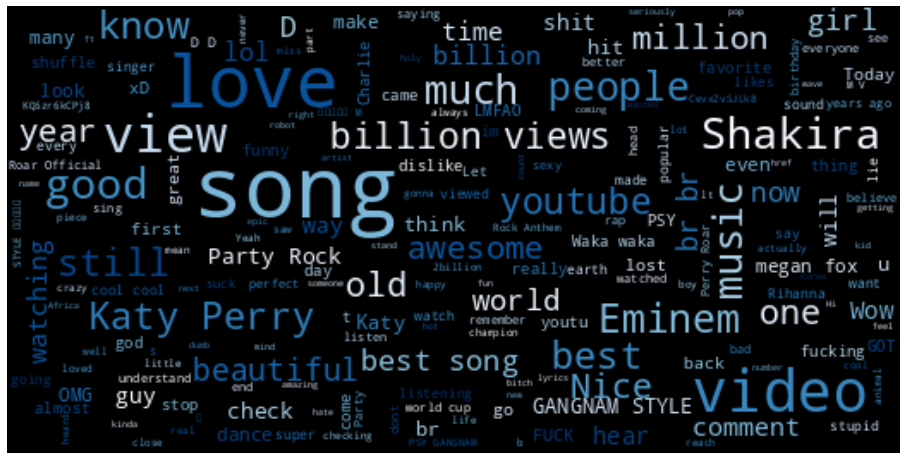

In [9]:
# wordcloud of not spam Comment
not_spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                          background_color ="black", colormap='Blues').generate(not_spam_text)
plt.figure(figsize=(16,10))
plt.imshow(not_spam_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

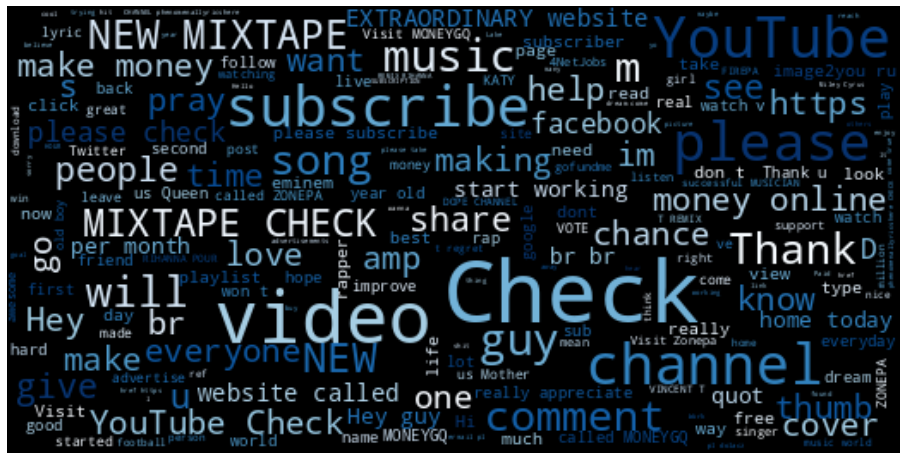

In [10]:
# wordcloud of Spam Comment
spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(spam_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

/Users/alvin/Documents/DUATIGA/Bagi Data/Upload ke Github dan Kaggle/nlpspam/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

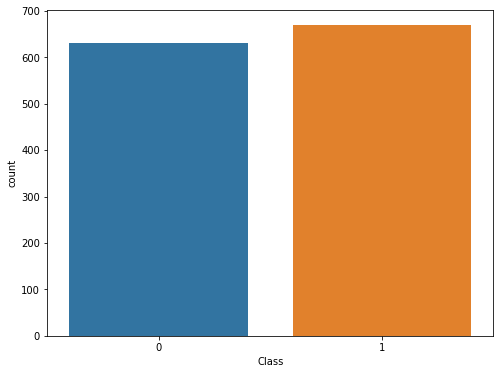

In [11]:
# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df.Class)

In [12]:
df['Max_Len'] = [len(s.split()) for s in df['Comment']]
df

,No,Comment,Class,Max_Len
0,1,this song is racist,0,4
1,2,and how many subscribers compared to her over ...,1,10
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1,11
3,4,well done shakira,0,3
4,5,:D subscribe to me for daily vines,1,7
...,...,...,...,...
1295,1296,Awsome<br />﻿,0,2
1296,1297,https://www.tsu.co/KodysMan plz ^^﻿,1,3
1297,1298,Sign up for free on TSU and start making money...,1,21
1298,1299,MEGAN FOX AND EMINEM TOGETHER IN A VIDEO DOES...,0,13


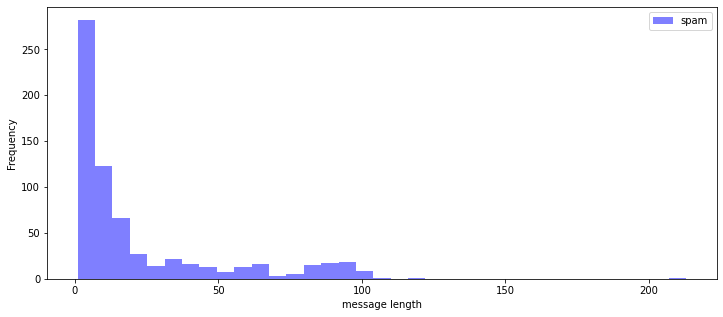

In [13]:
plt.figure(figsize=(12,5))
df[df['Class']==1]['Max_Len'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

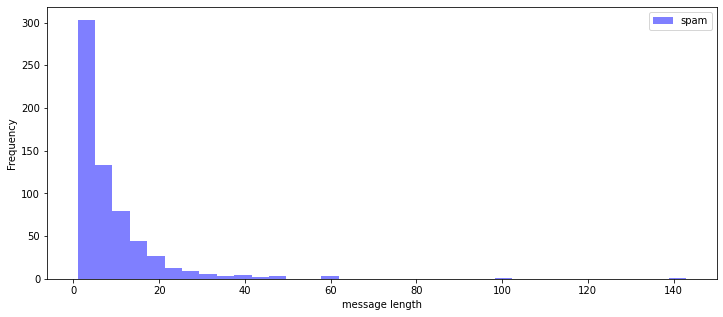

In [14]:
plt.figure(figsize=(12,5))
df[df['Class']==0]['Max_Len'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

In [15]:
df['Max_Len'].describe()

count    1300.000000
mean       16.150769
std        22.670421
min         1.000000
25%         4.750000
50%         7.000000
75%        16.000000
max       213.000000
Name: Max_Len, dtype: float64

In [16]:
X = df['Comment'].values
y = df['Class'].values

In [17]:
# Split data into train, val and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) 

In [18]:
# Defining pre-processing hyperparameters
max_len = 50
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 3120

In [19]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [20]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'the': 3,
 'this': 4,
 'and': 5,
 '\ufeff': 6,
 'out': 7,
 'check': 8,
 'to': 9,
 'my': 10,
 'you': 11,
 'a': 12,
 'it': 13,
 'on': 14,
 'of': 15,
 'is': 16,
 'video': 17,
 'com': 18,
 'for': 19,
 'youtube': 20,
 'song': 21,
 'please': 22,
 'me': 23,
 'in': 24,
 'like': 25,
 'so': 26,
 'love': 27,
 'if': 28,
 'can': 29,
 'subscribe': 30,
 'br': 31,
 '39': 32,
 'channel': 33,
 'new': 34,
 'just': 35,
 'http': 36,
 'music': 37,
 'up': 38,
 'be': 39,
 'am': 40,
 'have': 41,
 'guys': 42,
 'at': 43,
 'that': 44,
 'from': 45,
 'your': 46,
 'money': 47,
 'are': 48,
 'but': 49,
 'make': 50,
 'www': 51,
 't': 52,
 'get': 53,
 'will': 54,
 '000': 55,
 'views': 56,
 'all': 57,
 'as': 58,
 'people': 59,
 'she': 60,
 'mixtape': 61,
 '1': 62,
 'm': 63,
 'who': 64,
 'hey': 65,
 'with': 66,
 'best': 67,
 'https': 68,
 'katy': 69,
 'amp': 70,
 'not': 71,
 'visit': 72,
 'comment': 73,
 'how': 74,
 '3': 75,
 'over': 76,
 'called': 77,
 'more': 78,
 'do': 79,
 'does': 80,
 'u': 81,


In [21]:
# check how many words and max_len
print('Max_len: %s' % max([len(s.split()) for s in x_train]))

# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in data. ' % tot_words)

Max_len: 213
There are 3119 unique tokens in data. 


In [22]:
# Sequencing and padding on training and testing 
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

In [23]:
print('Shape of train tensor: ', train_padded.shape)
print('Shape of test tensor: ', test_padded.shape)

Shape of train tensor:  (1040, 50)
Shape of test tensor:  (260, 50)


In [24]:
print(len(train_sequences[0]), len(train_sequences[1]))
print(len(test_sequences[0]), len(test_sequences[1]))

101 94
21 6


In [25]:
# After padding
print(len(train_padded[0]), len(train_padded[1]))
print(len(test_padded[0]), len(test_padded[1]))

50 50
50 50


In [26]:
print(train_padded)

[[  2 333 107 ...   7  10  33]
 [182  42   2 ...  76   3 105]
 [  4  17  54 ...   0   0   0]
 ...
 [204 228 524 ...   0   0   0]
 [  8   7   4 ...   0   0   0]
 [ 25   3 567 ...   0   0   0]]


In [27]:
print(test_padded)

[[  36   51    1 ...    0    0    0]
 [   1    1 2074 ...    0    0    0]
 [  30    9   10 ...    0    0    0]
 ...
 [  22    8    7 ...    0    0    0]
 [  25    4   73 ...    0    0    0]
 [ 249  325    1 ...    0    0    0]]


In [28]:
embeding_dim = 16
drop_value = 0.2

In [29]:
#Dense model architecture
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embeding_dim,input_length=max_len))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(32,activation='relu'))
# model.add(layers.Dropout(drop_value))
model.add(layers.Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            49920     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 50,497
Trainable params: 50,497
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [32]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)

#Stratified K-Fold
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# splitting data into different folds
for train_index, val_index in kf.split(train_padded, y_train):
    x_train_kf, x_val_kf = train_padded[train_index], train_padded[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
    history = model.fit(x_train_kf, 
                    y_train_kf, 
                    epochs=num_epochs,
                    validation_data=(x_val_kf,y_val_kf),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/30


2021-07-30 06:56:48.682949: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


26/26 - 1s - loss: 0.6901 - accuracy: 0.5913 - val_loss: 0.6857 - val_accuracy: 0.6010
Epoch 2/30
26/26 - 0s - loss: 0.6805 - accuracy: 0.6226 - val_loss: 0.6744 - val_accuracy: 0.6202
Epoch 3/30
26/26 - 0s - loss: 0.6668 - accuracy: 0.6310 - val_loss: 0.6598 - val_accuracy: 0.6250
Epoch 4/30
26/26 - 0s - loss: 0.6466 - accuracy: 0.6466 - val_loss: 0.6381 - val_accuracy: 0.6538
Epoch 5/30
26/26 - 0s - loss: 0.6172 - accuracy: 0.6755 - val_loss: 0.6071 - val_accuracy: 0.7163
Epoch 6/30
26/26 - 0s - loss: 0.5776 - accuracy: 0.7127 - val_loss: 0.5671 - val_accuracy: 0.7885
Epoch 7/30
26/26 - 0s - loss: 0.5280 - accuracy: 0.8486 - val_loss: 0.5199 - val_accuracy: 0.8510
Epoch 8/30
26/26 - 0s - loss: 0.4705 - accuracy: 0.8930 - val_loss: 0.4674 - val_accuracy: 0.8654
Epoch 9/30
26/26 - 0s - loss: 0.4077 - accuracy: 0.9135 - val_loss: 0.4138 - val_accuracy: 0.8798
Epoch 10/30
26/26 - 0s - loss: 0.3453 - accuracy: 0.9315 - val_loss: 0.3679 - val_accuracy: 0.9327
Epoch 11/30
26/26 - 0s - loss:

In [33]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

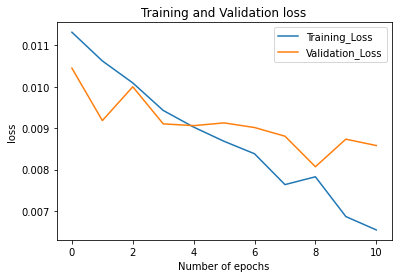

In [34]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

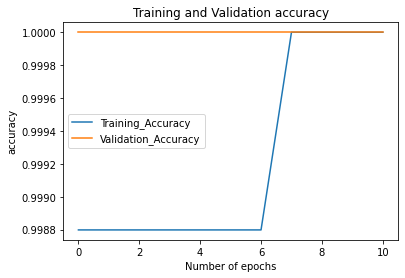

In [35]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [36]:
pred = (model.predict(test_padded) > 0.5).astype("int32")
acc = model.evaluate(test_padded, y_test)
proba_nn = model.predict(test_padded)

print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

9/9 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9385
Test loss is 0.17 accuracy is 0.94  
[[118   8]
 [  8 126]]


<AxesSubplot:>

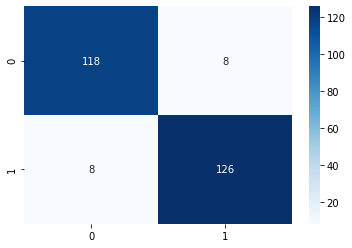

In [37]:
cf_matrix = confusion_matrix(pred, y_test)

sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

In [38]:
# Save the model as a file
model_filename = 'nlp_spam_comment_classification.h5'
models.save_model(model, model_filename)